## Gradient Boosting

Best parameters found: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}
Best cross-validation MAE: 18601.2389
Mean Absolute Error (MAE): 16108.1063
Mean Squared Error (MSE): 516924682.9102
R-squared (R2): 0.9259
Root Mean Squared Error (RMSE): 22735.9777
最適なGradient Boostingモデルが /Users/hayakawakazue/Downloads/house_price/model/gradient_boosting_0721_1.joblib に保存されました。
Mean Actual Value: 180007.70319634702
Mean Absolute Percentage Error (MAPE): 8.95%


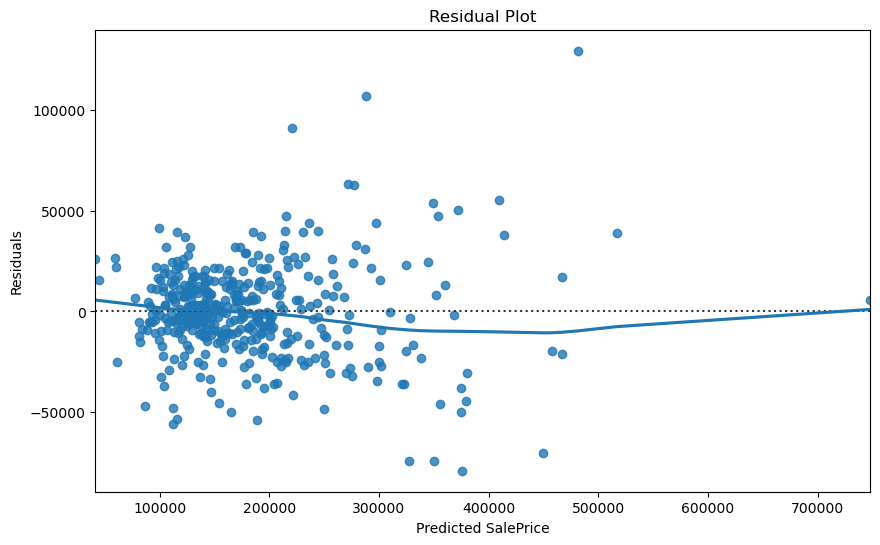

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
data = pd.read_csv(data_path)

# 選択された特徴量
important_features = [
    'OverallQual_Capped',  'OverallHomeQuality', 'FunctionalSpace', 
    'GarageQuality', 'capped_log_GrLivArea', 'TotalBath_Capped',
    'OverallCond', 'GarageCars_Capped', 'BsmtExposureQual', 'YearBuilt_Capped',
    'BasementQualityInteraction', 'log_TotalBsmtSF_Capped',
    'HouseAge', 'OutdoorSpaceQuality', 'PorchAndDeckArea', 'LotArea' 
]

# 特徴量と目的変数を分ける
X = data[important_features]
y = data['SalePrice']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boostingのグリッドサーチ
gbr = GradientBoostingRegressor(random_state=42)
gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
gbr_grid_search = GridSearchCV(estimator=gbr, param_grid=gbr_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=0)
gbr_grid_search.fit(X_train, y_train)

# 最適なハイパーパラメータの表示
print(f"Best parameters found: {gbr_grid_search.best_params_}")
print(f"Best cross-validation MAE: {-gbr_grid_search.best_score_:.4f}")

# 最適なモデルを取得
gbr_best = gbr_grid_search.best_estimator_

# テストデータを使った予測
y_pred = gbr_best.predict(X_test)

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 結果の表示
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# モデルの保存
model_path = os.path.join('/Users/hayakawakazue/Downloads/house_price/model', 'gradient_boosting_0721_1.joblib')
joblib.dump(gbr_best, model_path)
print(f"最適なGradient Boostingモデルが {model_path} に保存されました。")

# 実際の値の平均を計算
mean_actual_value = np.mean(y_test)
print(f"Mean Actual Value: {mean_actual_value}")

# 誤差のパーセンテージを計算
error_percentage = (mae / mean_actual_value) * 100
print(f"Mean Absolute Percentage Error (MAPE): {error_percentage:.2f}%")

# 残差プロットの作成
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=(y_test - y_pred), lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()
